# TITANIC

Dans cet exercice, nous allons passer en revue tout le processus de création d'un modèle d'apprentissage automatique sur le célèbre jeu de données Titanic. Il fournit des informations (classe, du sexe, de l'âge et de la survie) sur le sort des passagers du Titanic.

L'objectif ici est de prédire si un passager du Titanic aurait survécu ou non. 
Pour ce la nous allonsutlisé les modèles de classifications tels que les **KPP**, **Naive Bayes**, **Regression logistique** et le **SVM**

In [4]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### Importation des librairies

In [3]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import GaussianNB

### **Q1**: chargement des données d'entrainement et de test

chargez les données d'entrainement ("data/train.csv") et les données de test ("data/test.csv") respectivement dans les variables train et test en utilisant la fonction read_csv de pandas

In [3]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

NameError: name 'pd' is not defined

### **Q2**: Exploration/analyse des données

**a.   Affichez les informations sur le training set et expliquez ce que vous voyez** (la fonction info de pandas)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**b. Affichez les informations sur le test set et expliquez ce que vous voyez** (la fonction info de pandas)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**c.  Affrichez la descriptions des données avec la fonction ddescribe de  pandas**

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
train.head(10)
# pour afficher une partie des donnes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


d. Quelle transformations sur les données feriez vous afin que les algos d'apprentissage puissent les traiter?

**reponse**
.gerer les valeurs manquants
.convertir de nombruses attributs(categarielles) en attributs numériques
.les attributs ont des plages trés différentes,

### Examinons plus en détail les données réellement manquantes:train.isnull pour recuperer les vall nulles ,Sum pour la somme ,Sort_value 

In [48]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


**e. Que préconisez vous pour les attributs Embarked, Cabin, afin de gerer les valeur manquantes?**

**Réponse**:

l'attributs Embarked n'a que 2 valeurs manquants (0,22%), qui peuvent facilement etre reùplies.
l'attribut<<Cabin 
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

In [49]:
train.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Ci-dessus, vous pouvez voir les 11 attributs + la variable cible (survécu). 


**f. Quelles caractéristiques pourraient contribuer à un taux de survie élevé?<br>**

**Réponse**: 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

#### 1. Age et Sex:
Regardons le graphique de l'attribut **Age** et **Sex** par rapport a l'attribut **Survived**

/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

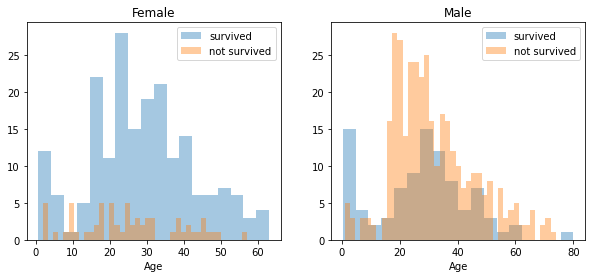

In [50]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

**g. Que montre les figures ( age sex) par rapport au survie)?**

**Réponse**:

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

#### 2. Embarked et Sex:

/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


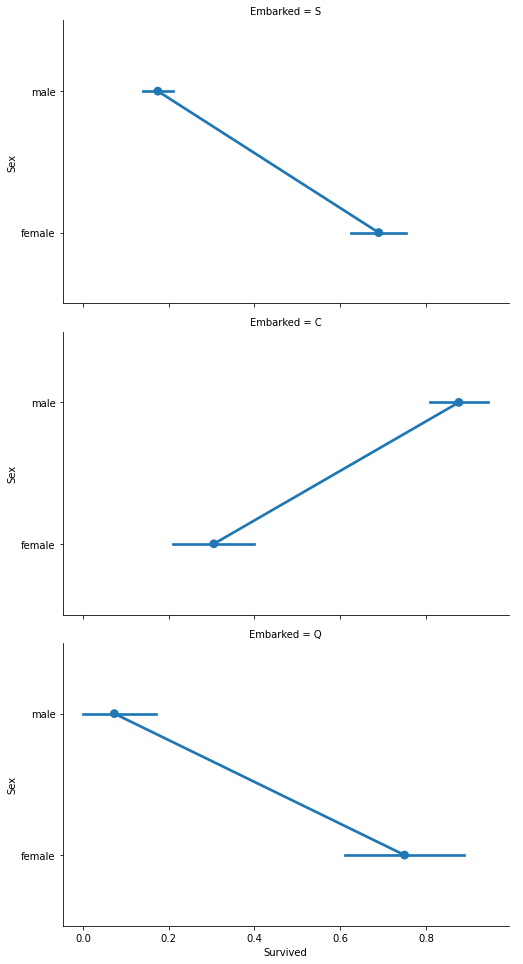

In [51]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot,'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**h. Que montre les figures (Embarked, Pclass and Sex) par rapport à la survie?**

**Réponse**:

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

#### 3. Pclass:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

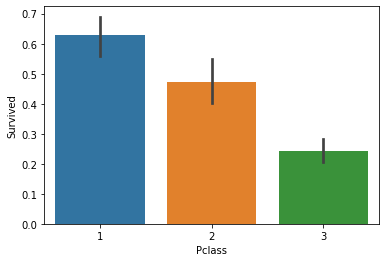

In [52]:
sns.barplot(x='Pclass', y='Survived', data=train)

**i. Que montre les figures ( Pclass) par rapport à la survie?**

**Réponse**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

Nous allons créer un autre graphique **Pclass** ci-dessous.

/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


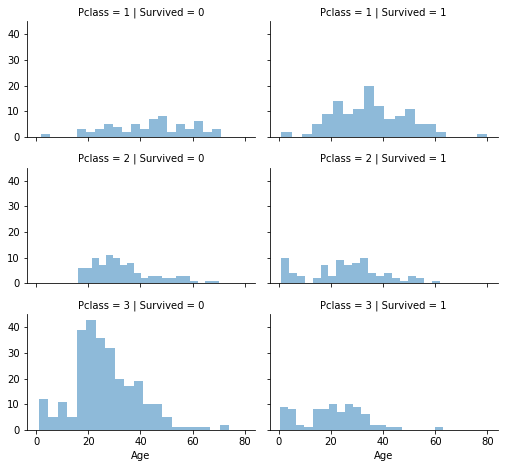

In [53]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**j. commentez le graphique ci-dessus**

**Réponse**:

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

#### 4. SibSp et Parch

**SibSp** et **Parch** auraient plus de sens en tant que attribut combiné, qui montre le nombre total de parents qu'une personne a sur le Titanic. Nous allons le créer ci-dessous et aussi une fonctionnalité qui montre si quelqu'un n'est pas seul.

In [4]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train['not_alone'].value_counts()

NameError: name 'train' is not defined

/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/media/al/DATA/anaconda3/envs/tf_gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


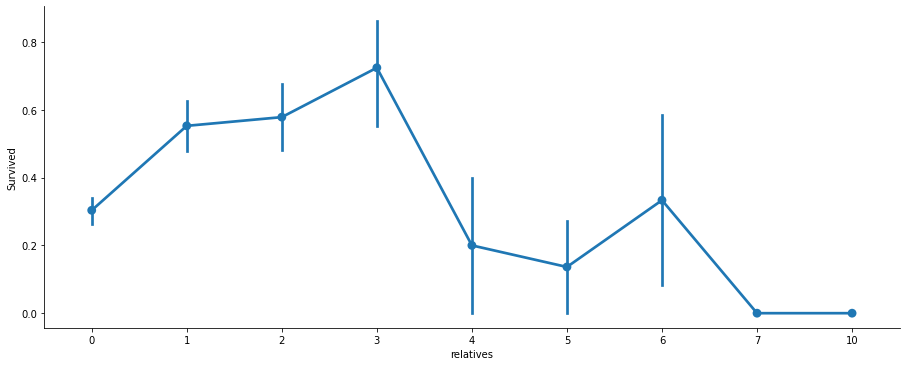

In [55]:
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5, )

**K. COmmentez la figure ci-dessus**

**Réponse**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>

### **Q3** Prétraitement des données

**a. Supprimmez «PassengerId» du train, car il ne contribue pas à la probabilité de survie d’une personne.**
(utilisez la function drop()

<br>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
#### Données manquantes

**Cabin**

Pour les données manquantes, nous devons traiter pour **Cabin (687)**, **Embarqué (2)** et **Age (177)**. J'ai d'abord pensé que nous devions supprimer la variable «Cabin», mais j'ai trouvé quelque chose d'intéressant. Un numéro de cabine ressemble à «C123» et la lettre fait référence au pont. Par conséquent, nous allons les extraire et créer une nouvelle varible, qui contient un deck de personnes. Après, nous convertirons la variable en une variable numérique. Les valeurs manquantes seront converties à zéro.

In [57]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin']= dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Age**

Nous pouvons maintenant résoudre le problème avec les valeurs manquantes des caractéristiques d'**Age**. Nous allons créer un tableau qui contient des nombres aléatoires, qui sont calculés en fonction de la valeur d'**Age moyenne**, l'**écart type**.

In [58]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
train["Age"].isnull().sum()

0

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Embarked**

Étant donné que l'attribut **Embarked** n'a que 2 valeurs manquantes, nous allons simplement les remplir avec la plus courante.

In [59]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [60]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Converting Features:**

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int64  
 13  Deck         891 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 97.6+ KB


Ci-dessus, vous pouvez voir que **Far**» est un flottant et que nous devons gérer 4 variables catégorielles: **Name**, **Sex**, **Ticket** et **EmbarKed**. 

**Fare:**

**b. La convertissez *Fare* de float en int64 dans le terain et le test set, en utilisant la fonction «astype ()» pandas:**

In [89]:
#

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Name:**

Nous utiliserons la caractéristiques Name pour extraire les titres du Name, afin de pouvoir créer un nouveau attribut à partir de cela.

In [63]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Sex:**
    
**c.    Convertissez la fonction «Sexe» en numérique.**

In [64]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Ticket:**

In [65]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Étant donné que l'attribut Ticket a 681 tickets uniques, il sera un peu difficile de les convertir en catégories utiles. 


**d. Supprimer de l'ensemble de données**.

In [90]:
#

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Embarked:**
    
**e.  Convertissez "Embarqué" en numérique**.

In [67]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
#### Création de catégories:

Nous allons maintenant créer des catégories dans les variables suivantes:

**Age**:

Nous devons maintenant convertir l'**Age**. Nous allons d'abord le convertir de **float** en **entier**. Ensuite, nous allons créer la nouvelle variable **AgeGroup**, en catégorisant chaque **Age** dans un groupe. Notez qu'il est important de porter attention à la manière dont vous formez ces groupes, car vous ne voulez pas par exemple que 80% de vos données appartiennent au groupe 1.

In [68]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [69]:
train['Age'].value_counts()

6    169
4    160
3    143
5    134
2    122
1     95
0     68
Name: Age, dtype: int64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
**Fare:**

Pour l'attribut **Fare**, nous devons faire la même chose que pour la fonction **Age**. Mais ce n’est pas si simple, car si nous découpions la fourchette des valeurs tarifaires en quelques catégories tout aussi grandes, $80%$ des valeurs tomberaient dans la première catégorie. Heureusement, nous pouvons utiliser la fonction sklearn «qcut ()», que nous pouvons utiliser pour voir comment nous pouvons former les catégories.

In [70]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,2,1,0,7,0,1,0,8,1
1,2,1,1,1,5,1,0,71,1,1,0,3,3
2,3,1,3,1,3,0,0,7,0,0,1,8,2
3,4,1,1,1,5,1,0,53,0,1,0,3,3
4,5,0,3,0,5,0,0,8,0,0,1,8,1
5,6,0,3,0,5,0,0,8,2,0,1,8,1
6,7,0,1,0,6,0,0,51,0,0,1,5,1
7,8,0,3,0,0,3,1,21,0,4,0,8,4
8,9,1,3,1,3,0,2,11,0,2,0,8,3
9,10,1,2,1,1,1,0,30,1,1,0,8,3


In [71]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
#### Créer de nouvelles attributs

Nous ajouterons deux nouveaux attributd à l'ensemble de données, que l'on calcule à partir d'autres attributs.

**1. Age fois Class**

In [72]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

**2. Tarif par Personne**

In [73]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
# Let's take a last look at the training set, before we start training the models.
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,2,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,3,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,4,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,5,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,6,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,7,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,8,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,9,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,10,1,2,1,1,1,0,2,1,1,0,8,3,2,1


<br><br>

## Création de modèles d'apprentissage automatique

Nous allons maintenant former plusieurs modèles d'apprentissage automatique et comparer leurs résultats. 

Notez que, comme l'ensemble de données ne fournit pas d'étiquettes pour leur ensemble de tests, nous devons utiliser les prédictions de l'ensemble d'apprentissage pour comparer les algorithmes les uns avec les autres. 


In [74]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test
#X_test  = test.drop("PassengerId", axis=1).copy()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
#### KPP

**Q4**:

* Initilaiser un KNeighborsClassifier avec k = 5
* Former le modele avec la ficntion _Fit_ sur les données d'apprentissages
* Faites une prediction avec les données de test
* afficher l'accuracy sur l'apprenstissage

In [92]:
#Code ici

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br><br>
#### Gaussian Naive Bayes:

**Q5**: Faites le meme travail que pour le **KPP**

In [91]:
#Code ici

#### Linear Support Vector Machine:

**Q6**: Faites le meme travail que pour le **KPP**

In [93]:
#code ici

#### Logistic Regression:

**Q8**: Faites le meme travail que pour le **KPP**

In [94]:
#code ici

**Q5 Quel est le meilleur modèle?**

In [95]:
#Code ici


<br>
<br>
